In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('logsdata.csv',index_col=0)

In [9]:
df

,id,lambda_function_name,event_time,write_to_database_timestamp,function_end_timestamp,billed_duration_ms,cold_start
0,image_capture_2025-05-08_17-00-00.jpg,site1-lambdafunction,2025-05-08 23:00:17,2025-05-08 23:00:40.448,2025-05-08 23:00:40.504,22215.0,True
1,image_capture_2025-05-08_16-00-00.jpg,site1-lambdafunction,2025-05-08 22:00:04,2025-05-08 22:00:22.488,2025-05-08 22:00:22.552,16755.0,True
2,image_capture_2025-05-08_15-00-00.jpg,site1-lambdafunction,2025-05-08 21:00:00,2025-05-08 21:00:24.596,2025-05-08 21:00:24.694,22421.0,True
3,image_capture_2025-05-08_14-00-00.jpg,site1-lambdafunction,2025-05-08 20:01:08,2025-05-08 20:01:35.978,2025-05-08 20:01:36.209,25966.0,True
4,image_capture_2025-05-08_13-00-00.jpg,site1-lambdafunction,2025-05-08 19:00:55,2025-05-08 19:01:17.586,2025-05-08 19:01:19.502,22355.0,True
...,...,...,...,...,...,...,...
19691,image_capture_2025-05-03_10-00-00.jpg,site300-lambdafunction,2025-05-03 16:01:07,2025-05-03 16:01:26.943,2025-05-03 16:01:30.906,21899.0,True
19692,image_capture_2025-05-03_00-59-59.jpg,site300-lambdafunction,2025-05-03 07:01:08,2025-05-03 07:01:26.423,2025-05-03 07:01:28.726,19205.0,True
19693,image_capture_2025-05-02_16-00-07.jpg,site300-lambdafunction,2025-05-02 22:03:54,2025-05-02 22:04:12.714,2025-05-02 22:04:13.618,17754.0,True
19694,image_capture_2025-05-02_11-01-02.jpg,site300-lambdafunction,2025-05-02 17:01:08,NaN,2025-05-02 17:01:32.858,23008.0,True


In [10]:
df['image_timestamp'] = pd.to_datetime(
    df['id'].str.extract(r'image_capture_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})')[0],
    format='%Y-%m-%d_%H-%M-%S'
)

In [11]:
df['event_time'] = pd.to_datetime(df['event_time'])
df['function_end_timestamp'] = pd.to_datetime(df['function_end_timestamp'])

# Calculate duration in seconds (or milliseconds if needed)
df['function_duration_sec'] = (df['function_end_timestamp'] - df['event_time']).dt.total_seconds()

In [12]:
df.image_timestamp.value_counts()[df.image_timestamp.value_counts()==20]

image_timestamp
2025-05-07 23:00:00    20
2025-05-07 14:00:00    20
2025-05-08 16:00:00    20
2025-05-03 04:00:00    20
2025-05-08 07:59:59    20
2025-05-07 05:00:00    20
2025-05-06 20:00:00    20
2025-05-03 13:00:00    20
2025-05-04 15:00:00    20
2025-05-02 18:59:59    20
2025-05-06 12:00:00    20
2025-05-04 07:00:00    20
2025-05-03 22:00:00    20
2025-05-06 03:00:00    20
2025-05-05 00:00:00    20
2025-05-05 09:00:00    20
2025-05-05 18:00:00    20
Name: count, dtype: int64

In [13]:
df= df[df.image_timestamp>'2025-05-02 17:30:00']

In [14]:
df.sort_values(by='image_timestamp')

,id,lambda_function_name,event_time,write_to_database_timestamp,function_end_timestamp,billed_duration_ms,cold_start,image_timestamp,function_duration_sec
130,image_capture_2025-05-02_18-00-00.jpg,site1-lambdafunction,2025-05-03 00:00:01,2025-05-03 00:00:18.895,2025-05-03 00:00:18.976,16252.0,True,2025-05-02 18:00:00,17.976
654,image_capture_2025-05-02_18-59-59.jpg,site5-lambdafunction,2025-05-03 01:00:03,2025-05-03 01:00:23.204,2025-05-03 01:00:23.260,18201.0,True,2025-05-02 18:59:59,20.260
2469,image_capture_2025-05-02_18-59-59.jpg,site19-lambdafunction,2025-05-03 01:00:04,2025-05-03 01:00:21.906,2025-05-03 01:00:22.092,16793.0,True,2025-05-02 18:59:59,18.092
394,image_capture_2025-05-02_18-59-59.jpg,site3-lambdafunction,2025-05-03 01:00:03,2025-05-03 01:00:23.260,2025-05-03 01:00:23.321,18205.0,True,2025-05-02 18:59:59,20.321
1433,image_capture_2025-05-02_18-59-59.jpg,site11-lambdafunction,2025-05-03 01:00:03,2025-05-03 01:00:24.341,2025-05-03 01:00:24.397,19281.0,True,2025-05-02 18:59:59,21.397
...,...,...,...,...,...,...,...,...,...
3708,image_capture_2025-05-08_17-00-00.jpg,site31-lambdafunction,2025-05-08 23:00:17,2025-05-08 23:00:35.599,2025-05-08 23:00:35.660,17376.0,True,2025-05-08 17:00:00,18.660
3599,image_capture_2025-05-08_17-00-00.jpg,site30-lambdafunction,2025-05-08 23:00:17,2025-05-08 23:00:37.161,2025-05-08 23:00:37.211,18984.0,True,2025-05-08 17:00:00,20.211
151,image_capture_2025-05-08_17-00-00.jpg,site2-lambdafunction,2025-05-08 23:00:17,2025-05-08 23:00:35.801,2025-05-08 23:00:35.849,17668.0,True,2025-05-08 17:00:00,18.849
4802,image_capture_2025-05-08_17-00-00.jpg,site41-lambdafunction,2025-05-08 23:00:17,2025-05-08 23:00:44.486,2025-05-08 23:00:44.548,25478.0,True,2025-05-08 17:00:00,27.548


In [15]:
concurrency = df.groupby('id').size().rename("concurrency")

# Merge the concurrency count back into the original DataFrame
df = df.merge(concurrency, on='id')

In [16]:
df=df.sort_values(by='image_timestamp')

In [17]:
df.concurrency.value_counts()

concurrency
300    4800
250    3750
200    3200
150    2400
100    1600
50      850
20      340
249     249
1        17
Name: count, dtype: int64

In [18]:
df.concurrency = df.concurrency.apply(lambda x: 250 if x==249 else x)

In [19]:
df.concurrency.value_counts()

concurrency
300    4800
250    3999
200    3200
150    2400
100    1600
50      850
20      340
1        17
Name: count, dtype: int64

In [20]:
df.cold_start.value_counts()

cold_start
True    17206
Name: count, dtype: int64

📊 Average Function Durations (sec):
Concurrency 1: 21.86 ms
Concurrency 50: 21.36 ms
Concurrency 100: 21.22 ms
Concurrency 150: 21.92 ms
Concurrency 200: 21.47 ms
Concurrency 250: 22.12 ms
Concurrency 300: 22.40 ms


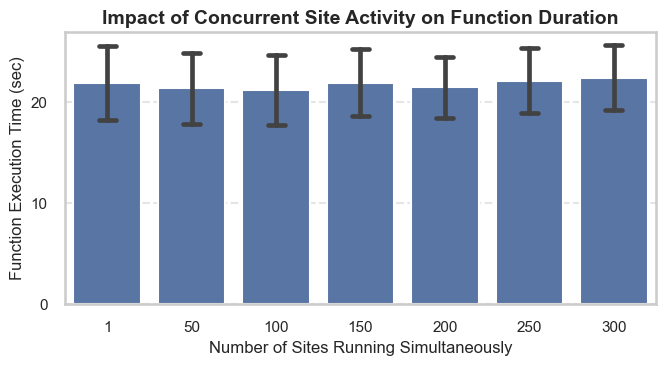

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns are numeric
df['concurrency'] = pd.to_numeric(df['concurrency'])

# Filter only for selected concurrency levels
selected_concurrency = [1, 50, 100, 150, 200, 250, 300]
df_filtered = df[df['concurrency'].isin(selected_concurrency)]

# Calculate averages
avg_durations = df_filtered.groupby('concurrency')['function_duration_sec'].mean().reset_index()

# Print the averages
print("📊 Average Function Durations (sec):")
for _, row in avg_durations.iterrows():
    print(f"Concurrency {int(row['concurrency'])}: {row['function_duration_sec']:.2f} ms")

# Set style
sns.set(style='whitegrid', context='talk')

# Plot
plt.figure(figsize=(7, 4))
barplot = sns.barplot(
    data=df_filtered,
    x='concurrency',
    y='function_duration_sec',
    errorbar='sd',
    capsize=0.2,
    color='#4C72B0'
)

# # Add annotations
# for i, row in avg_durations.iterrows():
#     barplot.text(
#         i, row['function_duration_ms'] + 10,  # 10 ms above the bar
#         f"{row['function_duration_ms']:.0f} ms",
#         color='black',
#         ha='center',
#         fontsize=10,
#         fontweight='semibold'
#     )

# Labels and title
plt.xlabel('Number of Sites Running Simultaneously', fontsize=12)
plt.ylabel('Function Execution Time (sec)', fontsize=12)
plt.title('Impact of Concurrent Site Activity on Function Duration', fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Fig 7.png',dpi=300)
plt.show()


💵 Average Lambda Cost per Invocation:
Concurrency 1: $0.002062
Concurrency 50: $0.002031
Concurrency 100: $0.002014
Concurrency 150: $0.002075
Concurrency 200: $0.002030
Concurrency 250: $0.002100
Concurrency 300: $0.002126


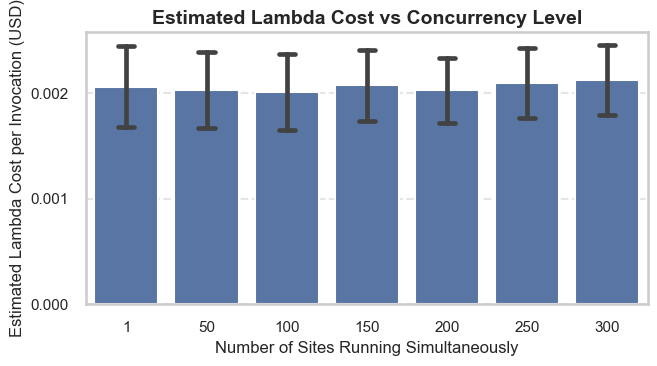

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
MEMORY_GB = 6.2
PRICE_PER_GB_SECOND = 0.0000166667

# Ensure numeric types
df['concurrency'] = pd.to_numeric(df['concurrency'])
df['billed_duration_ms'] = pd.to_numeric(df['billed_duration_ms'])

# Convert billed duration to cost
df['lambda_cost'] = (df['billed_duration_ms'] / 1000) * MEMORY_GB * PRICE_PER_GB_SECOND

# Filter for specific concurrency levels
selected_concurrency = [1, 50, 100, 150, 200, 250, 300]
df_filtered = df[df['concurrency'].isin(selected_concurrency)]

# Calculate average cost per concurrency level
avg_cost = df_filtered.groupby('concurrency')['lambda_cost'].mean().reset_index()

# Print cost summary
print("💵 Average Lambda Cost per Invocation:")
for _, row in avg_cost.iterrows():
    print(f"Concurrency {int(row['concurrency'])}: ${row['lambda_cost']:.6f}")

# Set style
sns.set(style='whitegrid', context='talk')

# Plot
plt.figure(figsize=(7, 4))
barplot = sns.barplot(
    data=df_filtered,
    x='concurrency',
    y='lambda_cost',
    errorbar='sd',
    capsize=0.2,
    color='#4C72B0'
)

# Axis labels and title
plt.xlabel('Number of Sites Running Simultaneously', fontsize=12)
plt.ylabel('Estimated Lambda Cost per Invocation (USD)', fontsize=12)
plt.title('Estimated Lambda Cost vs Concurrency Level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Fig. 8.png',dpi=300)
plt.show()



In [17]:
from scipy.stats import f_oneway

# Group data by concurrency levels
grouped_data = [group['function_duration_sec'].values for _, group in df_filtered.groupby('concurrency')]

# Perform ANOVA
f_stat, p_value = f_oneway(*grouped_data)

print(f"\n📈 ANOVA Results:\nF-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ The differences in function durations across concurrency levels are statistically significant (p < 0.05).")
else:
    print("❌ No statistically significant difference found across concurrency levels (p ≥ 0.05).")



📈 ANOVA Results:
F-statistic: 46.9699, p-value: 0.0000
✅ The differences in function durations across concurrency levels are statistically significant (p < 0.05).


In [35]:
from scipy.stats import f_oneway

# Group data by concurrency levels
grouped_data = [group['lambda_cost'].values for _, group in df_filtered.groupby('concurrency')]

# Perform ANOVA
f_stat, p_value = f_oneway(grouped_data[2],grouped_data[4])

print(f"\n📈 ANOVA Results:\nF-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ The differences in function durations across concurrency levels are statistically significant (p < 0.05).")
else:
    print("❌ No statistically significant difference found across concurrency levels (p ≥ 0.05).")



📈 ANOVA Results:
F-statistic: 2.5764, p-value: 0.1085
❌ No statistically significant difference found across concurrency levels (p ≥ 0.05).


In [31]:
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd

# Prepare results list
results = []

# All unique concurrency levels
levels = df_filtered['concurrency'].unique()
levels.sort()

# Perform Welch's t-test between each pair
for level1, level2 in combinations(levels, 2):
    data1 = df_filtered[df_filtered['concurrency'] == level1]['function_duration_sec']
    data2 = df_filtered[df_filtered['concurrency'] == level2]['function_duration_sec']
    
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
    
    results.append({
        'Comparison': f'{level1} vs {level2}',
        't-statistic': t_stat,
        'p-value': p_val
    })

# Convert to DataFrame
t_test_df = pd.DataFrame(results)

# Optional: Bonferroni correction
t_test_df['p-value (Bonferroni)'] = t_test_df['p-value'] * len(t_test_df)
t_test_df['Significant (α=0.05)'] = t_test_df['p-value (Bonferroni)'] < 0.05




In [32]:
t_test_df

,Comparison,t-statistic,p-value,p-value (Bonferroni),Significant (α=0.05)
0,1 vs 50,0.555017,5.862878e-01,1.231204e+01,False
1,1 vs 100,0.716617,4.837496e-01,1.015874e+01,False
2,1 vs 150,-0.068943,9.458796e-01,1.986347e+01,False
3,1 vs 200,0.430033,6.728667e-01,1.413020e+01,False
4,1 vs 250,-0.294107,7.724327e-01,1.622109e+01,False
5,1 vs 300,-0.607589,5.519410e-01,1.159076e+01,False
6,50 vs 100,0.958535,3.379285e-01,7.096498e+00,False
7,50 vs 150,-4.059460,5.189220e-05,1.089736e-03,True
8,50 vs 200,-0.872506,3.831065e-01,8.045237e+00,False
9,50 vs 250,-5.806015,8.223503e-09,1.726936e-07,True
